In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the file
file_path = 'hypertension_data.csv'
hypertension_df = pd.read_csv(file_path)

# Display the head of the dataframe and count the number of null values
hypertension_df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
hypertension_df = hypertension_df[(hypertension_df['BMI'] >= 14) & (hypertension_df['BMI'] <= 50)]
hypertension_df = hypertension_df[(hypertension_df['BMI'] <= 35) | (hypertension_df['GenHlth'] >= 3)]
hypertension_df = hypertension_df[~((hypertension_df['HvyAlcoholConsump'] == 1) | (hypertension_df['Smoker'] == 1)) | (hypertension_df['PhysActivity'] == 1) | (hypertension_df['GenHlth'] >= 4)]

In [38]:
entries_with_age_14 = hypertension_df[hypertension_df['Age'] == 14]
entries_with_age_14

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes


In [39]:
hypertension_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,62007.0,8.584015,2.868665,1.0,7.0,9.0,11.0,13.0
Sex,62007.0,0.455142,0.497988,0.0,0.0,0.0,1.0,1.0
HighChol,62007.0,0.523957,0.499430,0.0,0.0,1.0,1.0,1.0
CholCheck,62007.0,0.975970,0.153142,0.0,1.0,1.0,1.0,1.0
BMI,62007.0,29.124405,5.996255,14.0,25.0,28.0,32.0,50.0
Smoker,62007.0,0.432161,0.495380,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,62007.0,0.150209,0.357279,0.0,0.0,0.0,0.0,1.0
PhysActivity,62007.0,0.771381,0.419947,0.0,1.0,1.0,1.0,1.0
Fruits,62007.0,0.625333,0.484041,0.0,0.0,1.0,1.0,1.0
Veggies,62007.0,0.796813,0.402374,0.0,1.0,1.0,1.0,1.0


In [40]:
print(hypertension_df.isnull().sum())
print(hypertension_df.notnull().sum())

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64
Age                     62007
Sex                     62007
HighChol                62007
CholCheck               62007
BMI                     62007
Smoker                  62007
HeartDiseaseorAttack    62007
PhysActivity            62007
Fruits                  62007
Veggies                 62007
HvyAlcoholConsump       62007
GenHlth                 62007
MentHlth                62007
PhysHlth                62007
DiffWalk                62007
Stroke                  62007
HighBP                  62007
Diabetes 

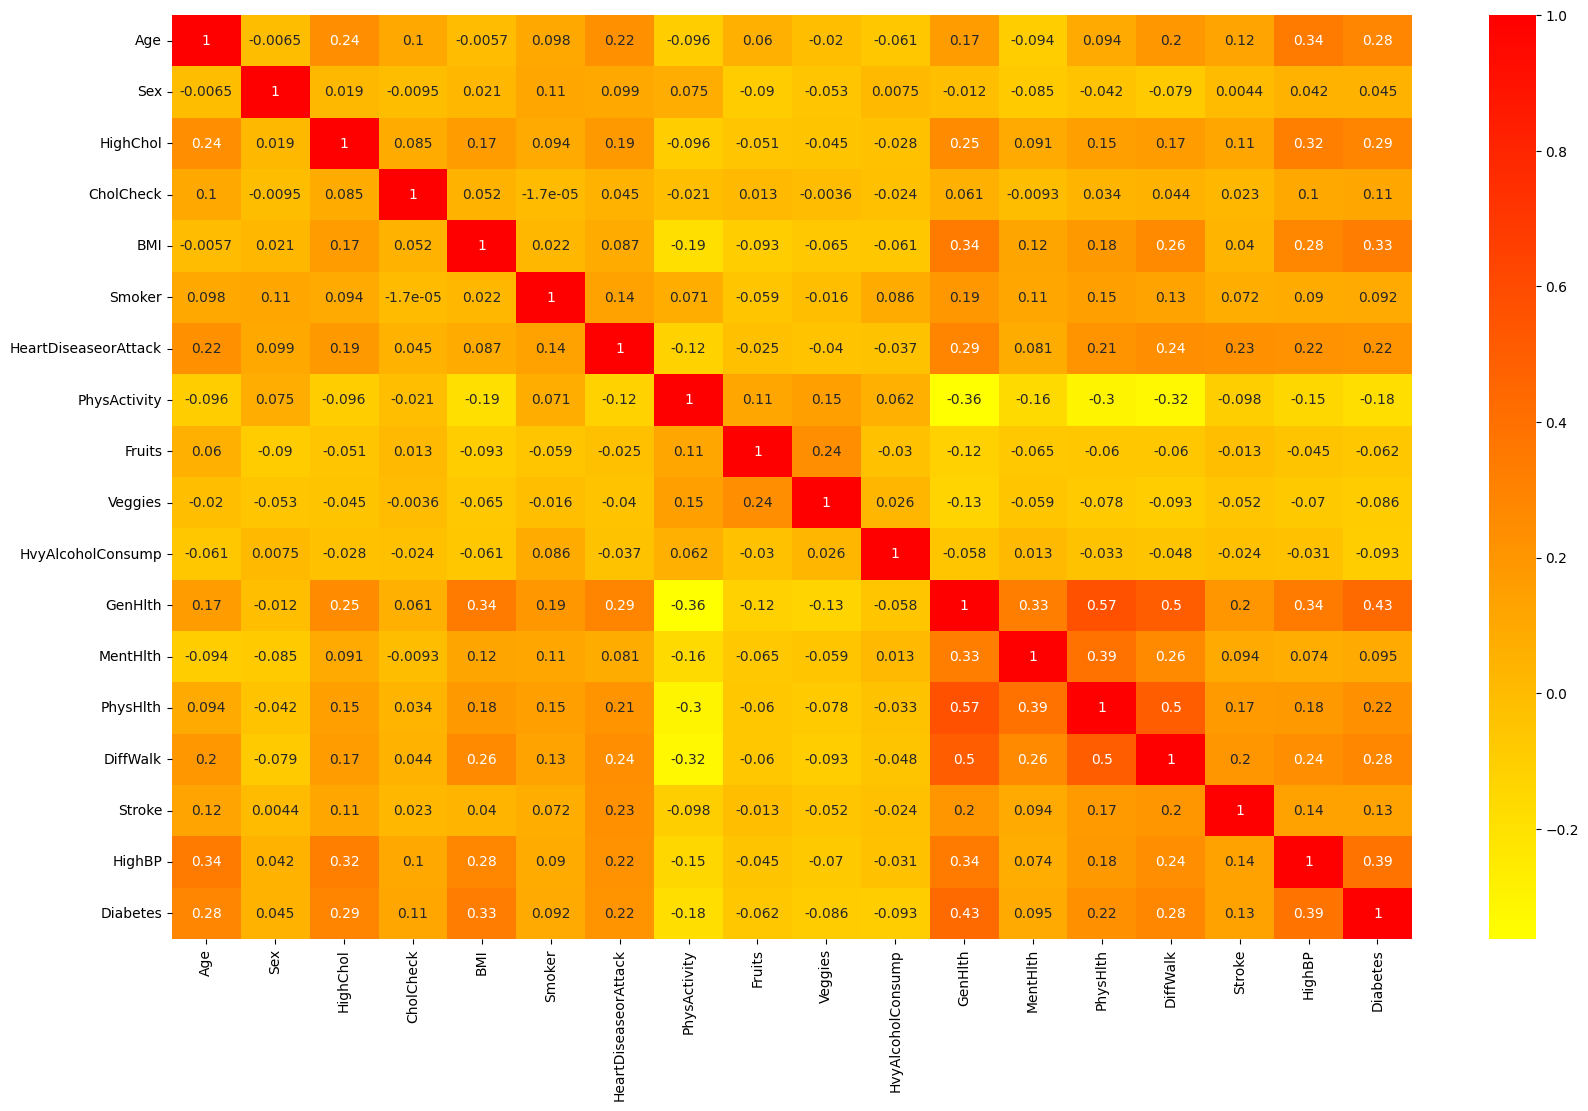

In [41]:
plt.figure(figsize=(20,12))
sns.heatmap(hypertension_df.corr(),annot=True,cmap="autumn_r")
plt.show()

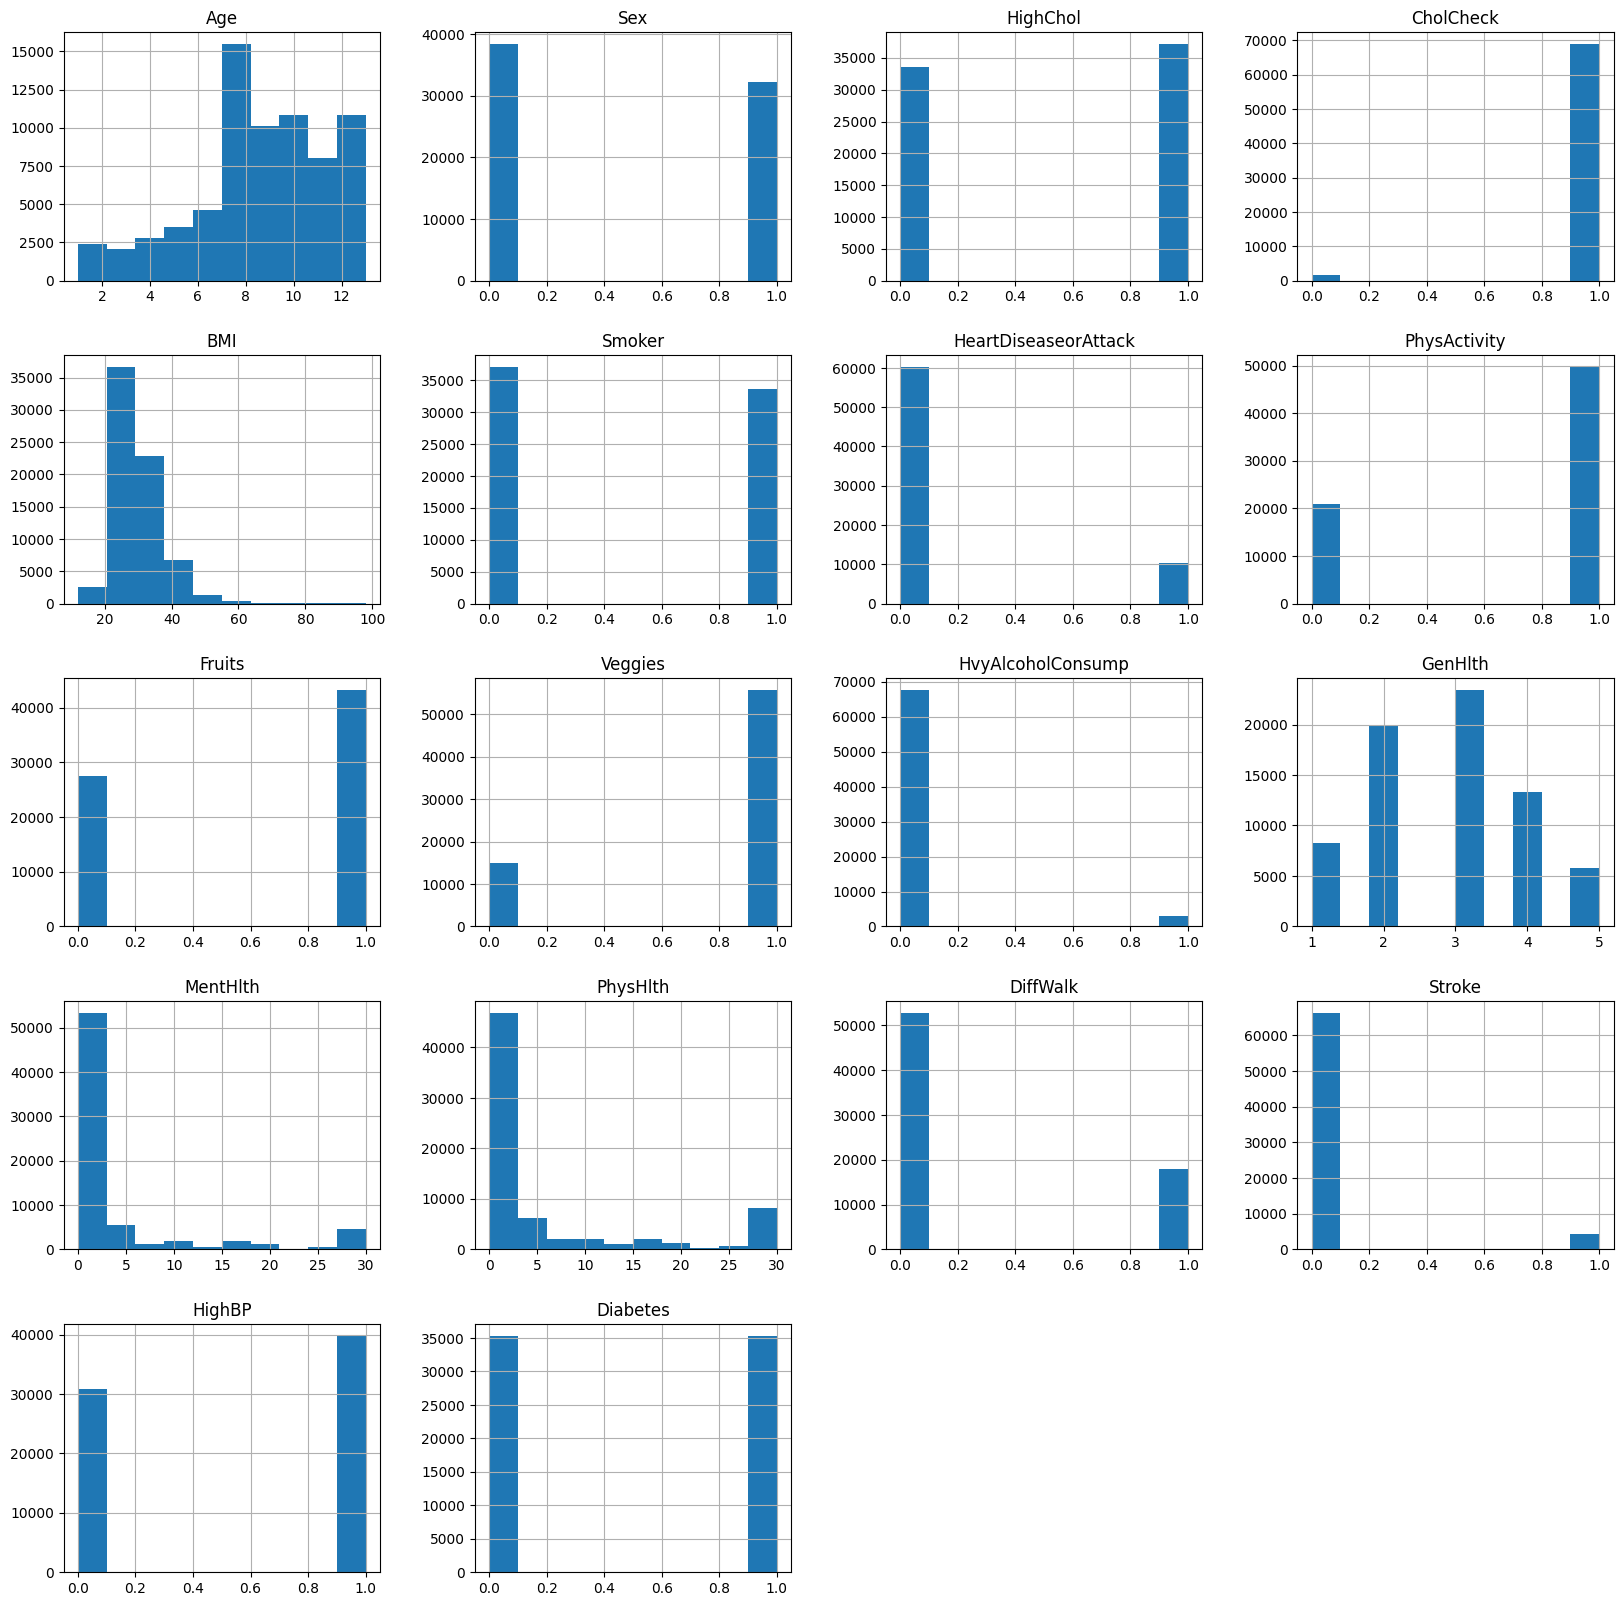

In [15]:
hypertension_df.hist(figsize=(20,20))
plt.show()

In [16]:
hypertension_df.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

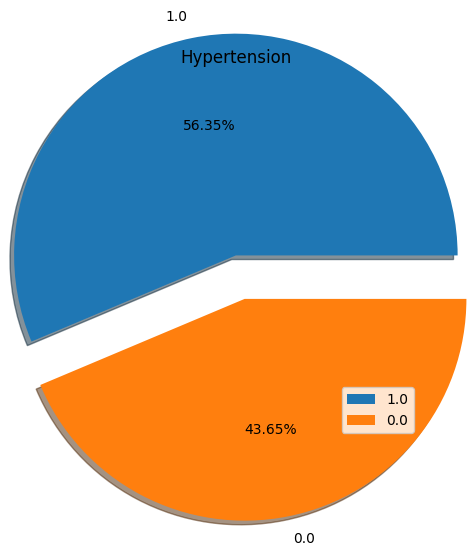

In [17]:
plt.pie(hypertension_df["HighBP"].value_counts(),labels = hypertension_df["HighBP"].unique(),autopct = "%.2f%%",shadow=True,explode=(0,0.3),radius=1.5);
plt.title("Hypertension")
plt.legend()
plt.show()

In [18]:
hypertension_df[hypertension_df.MentHlth == 30.0].HighBP.value_counts()

HighBP
1.0    2863
0.0    1457
Name: count, dtype: int64

In [19]:
hypertension_df[hypertension_df.MentHlth == 1.0].HighBP.value_counts()

HighBP
0.0    1056
1.0     995
Name: count, dtype: int64

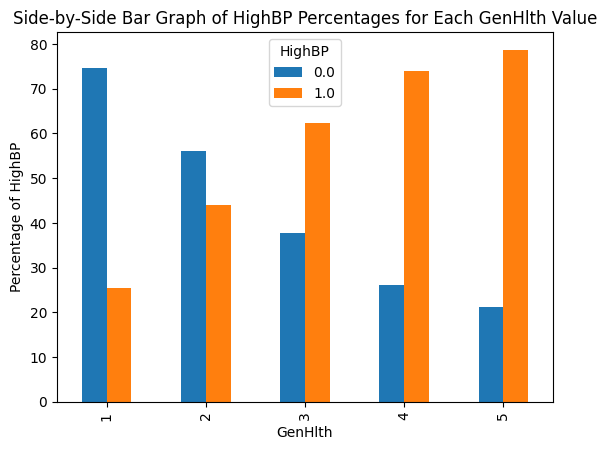

In [20]:
# Function to plot side-by-side bar graphs for a given column
def plot_highbp_percentages(column_name):
    unique_values = sorted(hypertension_df[column_name].unique())
    percentages_df = pd.DataFrame()

    for value in unique_values:
        counts = hypertension_df[hypertension_df[column_name] == value]['HighBP'].value_counts(normalize=True) * 100
        percentages_df[value] = counts

    percentages_df = percentages_df.T

    percentages_df.plot(kind='bar')
    plt.xlabel(column_name)
    plt.ylabel('Percentage of HighBP')
    plt.title(f'Side-by-Side Bar Graph of HighBP Percentages for Each {column_name} Value')
    plt.legend(title='HighBP')
    plt.show()

# # Plot for PhysHlth
# plot_highbp_percentages('PhysHlth')

# Plot for GenHlth
plot_highbp_percentages('GenHlth')

# plot_highbp_percentages('MentHlth')

# plot_highbp_percentages('HvyAlcoholConsump')

# plot_highbp_percentages('Smoker')

# plot_highbp_percentages('HeartDiseaseorAttack')

# plot_highbp_percentages('Stroke')

# plot_highbp_percentages('Diabetes')

# plot_highbp_percentages('DiffWalk')

C:\Users\samco\AppData\Local\Temp\ipykernel_22176\1303257556.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(bmi_high_bp, label='HighBP', shade=True, color='r', common_norm=True)
C:\Users\samco\AppData\Local\Temp\ipykernel_22176\1303257556.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(bmi_normal_bp, label='NormalBP', shade=True, color='b', common_norm=True)


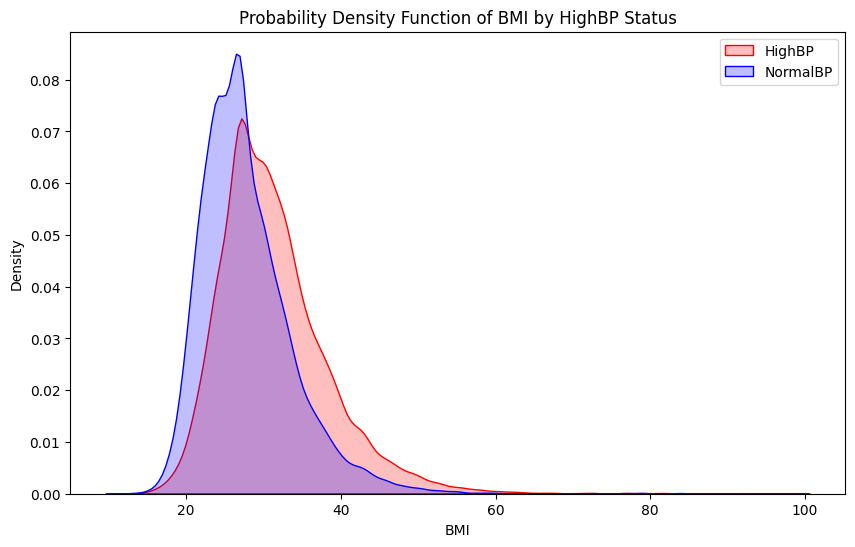

In [21]:
# Assuming hypertension_df is already defined

# Extract BMI and HighBP columns
bmi = hypertension_df['BMI']
high_bp = hypertension_df['HighBP']

# Separate BMI values based on HighBP status
bmi_high_bp = hypertension_df[hypertension_df['HighBP'] == 1]['BMI']
bmi_normal_bp = hypertension_df[hypertension_df['HighBP'] == 0]['BMI']

# Create a PDF plot
plt.figure(figsize=(10, 6))
sns.kdeplot(bmi_high_bp, label='HighBP', shade=True, color='r', common_norm=True)
sns.kdeplot(bmi_normal_bp, label='NormalBP', shade=True, color='b', common_norm=True)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Probability Density Function of BMI by HighBP Status')
plt.legend()
plt.show()
plt.show()

In [22]:
filtered_entries = hypertension_df[(hypertension_df['BMI'] > 70)]

# Display the filtered entries
print(filtered_entries)

        Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
553     2.0  0.0       0.0        1.0  92.0     1.0                   0.0   
612    10.0  0.0       1.0        1.0  98.0     1.0                   0.0   
783    11.0  1.0       0.0        1.0  79.0     1.0                   0.0   
1070   11.0  1.0       1.0        1.0  79.0     1.0                   0.0   
1426    3.0  1.0       0.0        1.0  72.0     0.0                   0.0   
...     ...  ...       ...        ...   ...     ...                   ...   
64955   5.0  1.0       1.0        1.0  89.0     0.0                   0.0   
66279   6.0  0.0       0.0        1.0  72.0     0.0                   0.0   
67135  10.0  1.0       1.0        1.0  81.0     0.0                   1.0   
67172   2.0  0.0       0.0        1.0  74.0     0.0                   0.0   
67312   8.0  0.0       0.0        1.0  72.0     0.0                   0.0   

       PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth 

In [23]:
# Assuming hypertension_df is already defined

# Filter entries where BMI is below 15 or above 40
filtered_entries = hypertension_df[(hypertension_df['BMI'] < 15) | (hypertension_df['BMI'] > 70)]

# Print the number of filtered entries
print(f"Number of entries with BMI below 15 or above 40: {len(filtered_entries)}")

Number of entries with BMI below 15 or above 40: 166


In [24]:
# Filter entries where BMI is greater than 80
bmi_over_40 = hypertension_df[(hypertension_df['BMI'] > 50) & (hypertension_df['Smoker'] == 1) & (hypertension_df['PhysActivity'] == 0)]

# Get the value counts of the GenHlth column
genhlth_value_counts = bmi_over_40['GenHlth'].value_counts()

# Print the value counts
print(genhlth_value_counts)

print(bmi_over_40['HighBP'].value_counts())

GenHlth
4.0    90
5.0    73
3.0    59
2.0    16
1.0     1
Name: count, dtype: int64
HighBP
1.0    192
0.0     47
Name: count, dtype: int64


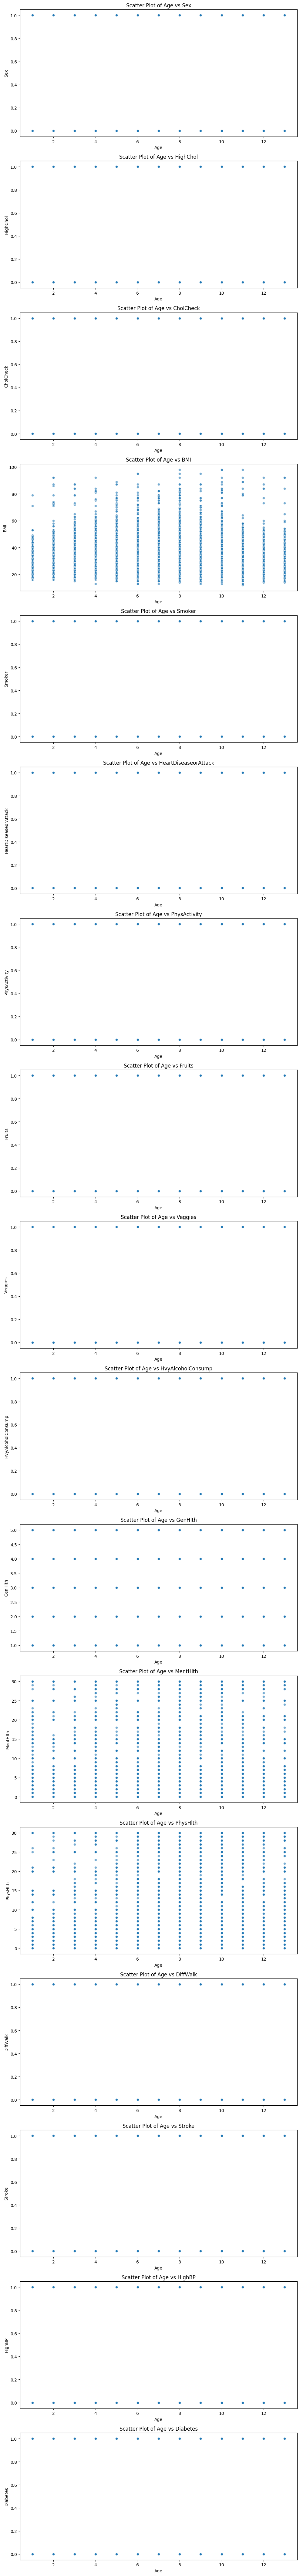

In [25]:
# List of features to plot against age
features = hypertension_df.columns[1:]

# Number of features
num_features = len(features)

# Create subplots
fig, axes = plt.subplots(num_features, 1, figsize=(10, 5 * num_features))

# Plot each feature against age
for i, feature in enumerate(features):
    axes[i].scatter(hypertension_df['Age'], hypertension_df[feature], alpha=0.6, edgecolors='w')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(feature)
    axes[i].set_title(f'Scatter Plot of Age vs {feature}')

# Adjust layout
plt.tight_layout()
plt.show()